## Classification and Regression trees: Use decision trees to do classification using classifiers and gini measure (denotes impurity of node) & do regression using regressor trees and rmse 

## CART

### Classification

In [2]:
import os
import pandas as pd
import numpy as np
import random 
#for test train split
from sklearn.model_selection import train_test_split
#for Classification
from sklearn.tree import DecisionTreeClassifier
#for Regression
from sklearn.tree import DecisionTreeRegressor
#confusion matrix
from sklearn.metrics import confusion_matrix
os.chdir('C:\\Users\\satish\\Downloads\\')
iris = pd.read_csv("iris.csv")
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [2]:
X= iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= iris[['species']]

In [33]:
## q: why do we need to use stratified random sampling to split data into train,test,validation for a classification problem
# a: so that equal proportion and training for each class

In [3]:
(X_train,X_test,y_train,y_test)= train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 1)
(45, 1)


In [4]:
#class proportion check in train data
print(y_train['species'].value_counts())
print(y_train['species'].value_counts()/len(y_train))

Iris-setosa        35
Iris-virginica     35
Iris-versicolor    35
Name: species, dtype: int64
Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: species, dtype: float64


In [13]:
# buid and fit decision tree
classifier_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3, min_samples_leaf = 5, random_state = 100)

classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [14]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #for train test splitting
from sklearn.tree import DecisionTreeClassifier #for decision tree object
from sklearn.metrics import classification_report, confusion_matrix #for checking testing results 
from sklearn.tree import plot_tree #for visualizing tree

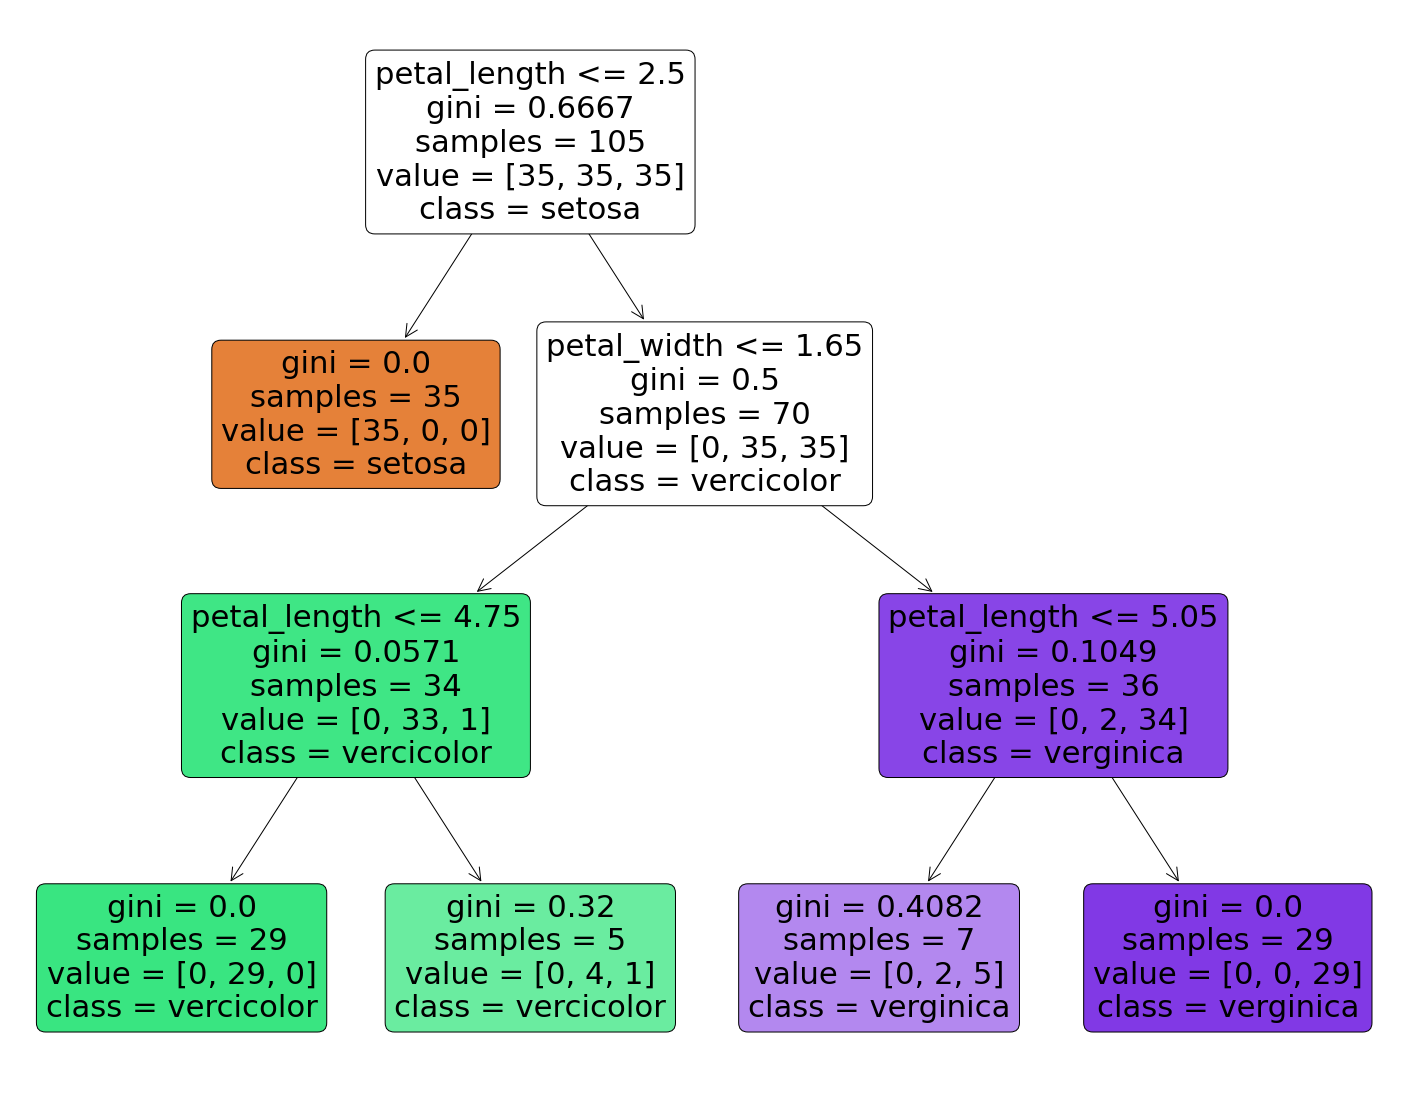

In [15]:
# Interpret the tree
fig = plt.figure(figsize=(25,20))

# filled = true to paint
dec_tree = plot_tree(decision_tree = classifier_gini, feature_names = feature_cols, 
                     class_names = ["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

### From this we can see the decision tree, has depth 3, the non - leaf nodes have split criteria on the features and corresponding gini value and number of samples considered in that node. Also the values node denotes the number of samples for each class in that node, which sums up to samples value. class denotes the majority from value array, if it's a tie, first class is chosen. So the final class can be seen in the leaves, which don't have the splitting criteria. Here we can also see that the depth 3 is unnecessary due to redundant classes, so max_depth = 2 is enough

In [16]:
# do prediction on test
y_pred = classifier_gini.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
# form confusion matrix and find accuracy scores

c= confusion_matrix(y_test,y_pred)
c

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [19]:
# full report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [ ]:
## precision for each class = tp/(tp+fp)   # how correct it is for positive
## recall = tp/(tp+fn)   # supposed to have been all positive
## accuracy = tp+tn/(tp+tn+fp+fn)

### Regression

In [3]:
# read data 
cars = pd.read_csv("cars.csv")
print(cars.shape)
cars.head(2)

(406, 9)


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US


In [4]:
X=cars[["Cylinders","Weight","Horsepower"]]
y=cars["MPG"]

In [5]:
feature_cols = ["Cylinders","Weight","Horsepower"]

In [6]:
# split into train and test
(X_train,X_test,y_train,y_test) = train_test_split(X,y, test_size=0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(284, 3)
(122, 3)
(284,)
(122,)


In [7]:
# build and fit decision tree
model = DecisionTreeRegressor(max_depth=3,min_samples_leaf=5)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [8]:
# do prediction 
y_pred = model.predict(X_test)
y_pred

array([19.2483871 , 32.89833333, 25.4452381 , 25.4452381 , 25.74545455,
       25.4452381 , 19.2483871 , 25.4452381 , 19.2483871 , 25.4452381 ,
       32.89833333, 11.7       , 11.7       , 32.89833333, 25.4452381 ,
       25.4452381 , 28.51071429, 19.2483871 , 25.74545455, 25.4452381 ,
       25.4452381 , 25.4452381 , 25.4452381 , 28.51071429, 19.2483871 ,
       15.12564103, 19.2483871 , 19.2483871 , 25.4452381 , 32.89833333,
       19.2483871 , 19.2483871 , 25.74545455, 32.89833333, 15.12564103,
       32.89833333, 19.2483871 , 25.4452381 , 19.2483871 , 11.7       ,
       25.74545455, 32.89833333, 19.2483871 , 19.2483871 , 32.89833333,
       25.4452381 , 15.12564103, 32.89833333, 25.4452381 , 19.2483871 ,
       32.89833333, 28.91111111, 25.74545455, 11.7       , 11.7       ,
       19.2483871 , 11.7       , 32.89833333, 19.2483871 , 15.12564103,
       19.2483871 , 19.2483871 , 32.89833333, 19.2483871 , 19.2483871 ,
       25.4452381 , 32.89833333, 32.89833333, 32.89833333, 32.89

In [9]:
# find accuracy (rmse)
np.sqrt(np.mean (np.array(y_test) - y_pred)**2  )

0.06136123263304713

In [10]:
neighbours = list(range(1,50))

In [11]:
# Interpret the tree
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

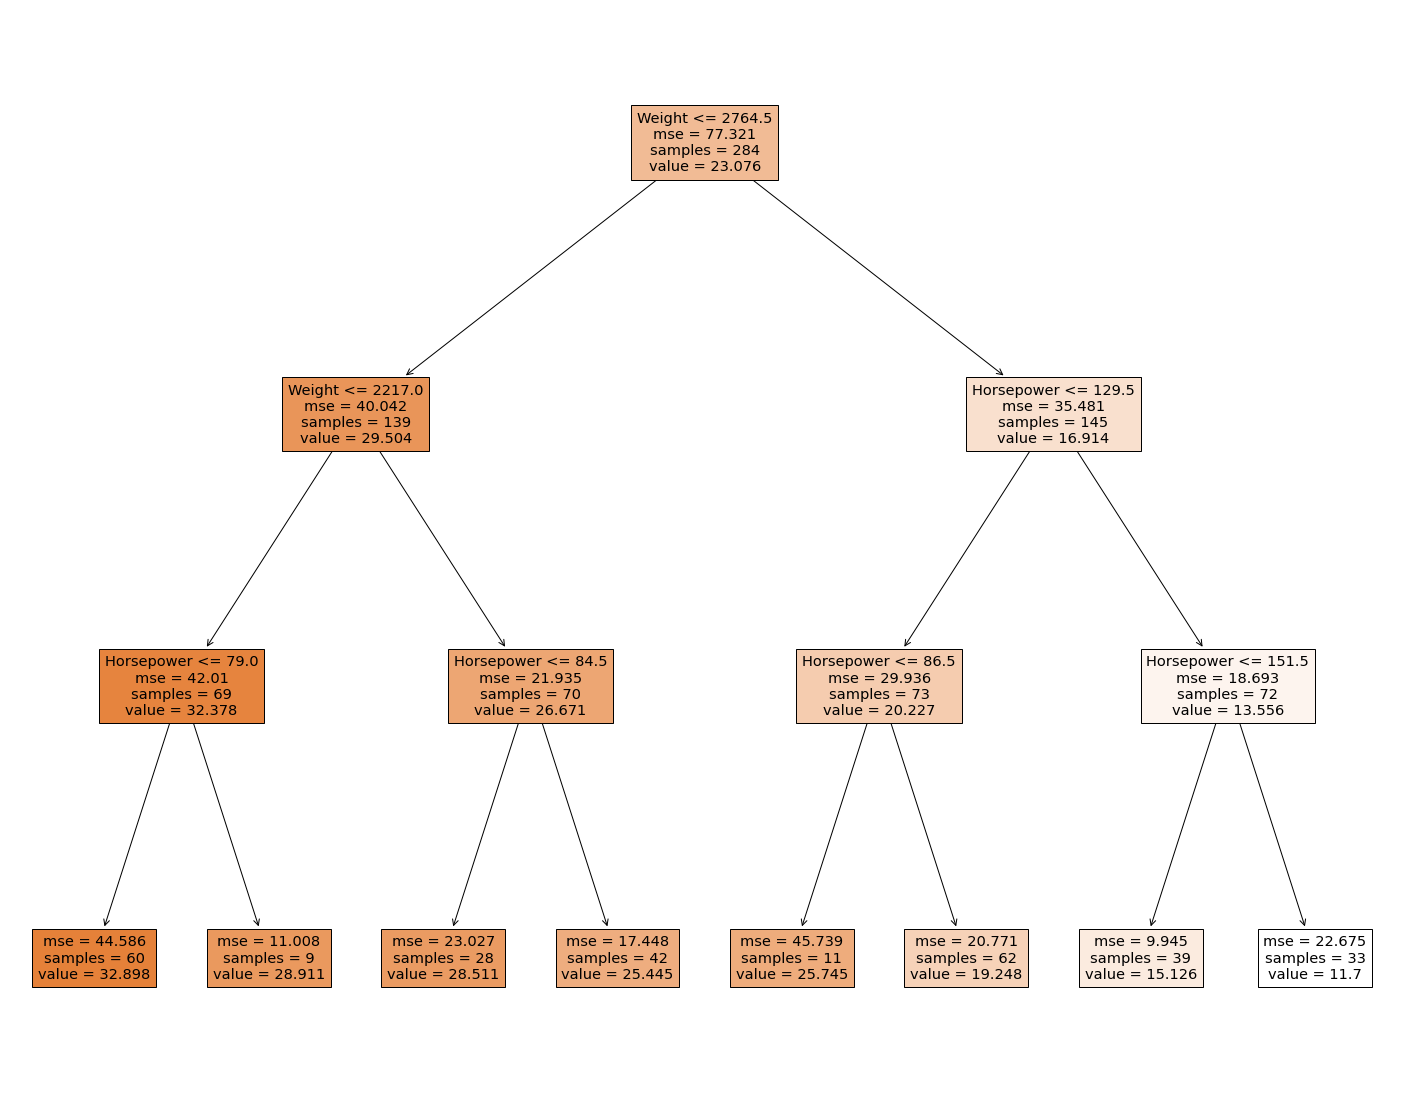

In [16]:
fig = plt.figure(figsize=(25,20))
plotreg = plot_tree(model, feature_names = feature_cols, filled = True)

### From above regressor tree, we can see that the non-leaf nodes have splitting criterion and all have mse measure for that split and total samples in that node and resulting mpg value (obtained by mean of mpg values ) from that node. Leaf nodes without split criterion give final result as value.  

In [14]:
y_train.mean()

23.076408450704225